#Proyecto 1 Parte 2

#1. Descarga los datos usando este enlace:  descarga los datos. (Nota: Fuente original de los datos)

Comienzo por llamar la data y pedir los primeros 10 filas para tener una idea general de lo que hay, ya veo un NaN en columna 2, posicion 7 y columna 9 posicion 4

In [1]:
import pandas as pd
filename = "/content/drive/MyDrive/Colab Notebooks/Ejercicios 05 Julio/sales_predictions.csv"
df = pd.read_csv(filename)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Verificaremos la data nula

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Tenemos datos nulos en las siguientes columnas, los cuales son muchos datos faltantes para solo eliminarlos:

*   Item_Weight  
*    Outlet_Size 




Limpieza Item_Weight

In [3]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Filtrare los NaN de Item Weight Primero para ver como se ven:termino confirmando que si son datos solo del año 1985

In [4]:
filterna1=df['Item_Weight'].isna()
df1 = df.loc[filterna1, :]
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,0.0,1463.000000,1463.000000,1463.0,1463.000000
mean,NaN,0.076597,139.796485,1985.0,2483.677474
std,NaN,0.063012,61.617672,0.0,2347.516621
min,NaN,0.000000,31.290000,1985.0,33.955800
25%,NaN,0.029545,92.630400,1985.0,399.480000
50%,NaN,0.060588,143.781200,1985.0,1845.597600
75%,NaN,0.110718,184.426600,1985.0,3968.168000
max,NaN,0.328391,266.588400,1985.0,13086.964800


Dado que la informacion de Item_Identifier es un "Número de identificación único del producto" espero que esto sea una llave y por ende si otra tienda tiene el mismo codigo, el peso del producto sea unico o al menos referencial.

Creo una variable que le de el peso promedio por cada codigo de Item Identifier, aplico una funcion lambda para que a la columna de Item Weight le vaya reemplazando los NaN por el promedio del codigo.

https://www.youtube.com/watch?v=O2q7tSPLCJg

In [5]:
weightme=df.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))
weightme.head(10) #Me aseguro que en el puesto 7 no haya un NaN

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7    19.000
8    16.200
9    19.200
Name: Item_Weight, dtype: float64

Ahora reemplazo esta variable que tiene el peso promedio del codigo identificador sobre los Nan en mi data frame original (reemplazando la columna nueva sin Nan en el DF original

In [6]:
df['Item_Weight']=df.loc[: ,'Item_Weight'].fillna(weightme)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Limpieza de Outlet_Size

Partiremos mirando la data de los NaN de Outlet Size filtrando la informacion y viendo el describe

In [7]:
filterna2=df['Outlet_Size'].isna()
df2 = df.loc[filterna2, :]
df2.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


¿Cuales son los campos que hay en en df2 que son los Nan de Outlet Size pero mirados en Outlet Identifier? Porque Outler Identifier es un dato unico, ¿Estara el datoque busco amarrado a la llave de Outlet Identifier? Veamos en el no filtro si tenemos OUT 45, 17 y 10.

In [8]:
#df['Outlet_Size'].notna().value_counts()
df3 = df.loc[~filterna2, :]
df3[["Outlet_Identifier","Outlet_Type",  "Outlet_Location_Type","Outlet_Size"]].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Location_Type  Outlet_Size
OUT027             Supermarket Type3  Tier 3                Medium         935
OUT013             Supermarket Type1  Tier 3                High           932
OUT035             Supermarket Type1  Tier 2                Small          930
OUT046             Supermarket Type1  Tier 1                Small          930
OUT049             Supermarket Type1  Tier 1                Medium         930
OUT018             Supermarket Type2  Tier 3                Medium         928
OUT019             Grocery Store      Tier 1                Small          528
dtype: int64

Y no estan, nos toca elegir que input poner. Pero al agregar mas data cuali como el Typo de local y la Locacion, nos damos cuenta que tenemos por rellenar:

*   Supermercado Tipo 1 y tier 2
*   Grocery

Ambas clasificaciones en lo que si tienen data es Small asi que reemplazare por eso



In [9]:
df['Outlet_Size'].fillna("Small", inplace=True)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


Siguen quedando 4 coodigos de producto sin peso asi que los rellenaremos por el peso promedio del tipo de producto

In [10]:
filterna1=df['Item_Weight'].isna()
df1 = df.loc[filterna1, :]
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [11]:
weight2me=df.groupby('Item_Type')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))
df['Item_Weight']=df.loc[: ,'Item_Weight'].fillna(weight2me)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Todo quedó con data

#2. ¿Cuáles son algunos resúmenes estadísticos, información agregada, u otras tendencias que puedes observar en los datos usando Pandas?

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875418,0.066132,140.992782,1997.831867,2181.288914
std,4.645016,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


no podemos concluir mucho de describe, empezaremos a segmentar, partiremos entendiendo la clasificacion de las tiendas

In [14]:
#df.columns
df[['Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']].value_counts()


Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type      
OUT027             1985                       Medium       Tier 3                Supermarket Type3    935
OUT013             1987                       High         Tier 3                Supermarket Type1    932
OUT035             2004                       Small        Tier 2                Supermarket Type1    930
OUT046             1997                       Small        Tier 1                Supermarket Type1    930
OUT049             1999                       Medium       Tier 1                Supermarket Type1    930
OUT045             2002                       Small        Tier 2                Supermarket Type1    929
OUT018             2009                       Medium       Tier 3                Supermarket Type2    928
OUT017             2007                       Small        Tier 2                Supermarket Type1    926
OUT010             1998                       Small  

In [15]:
df.groupby(['Outlet_Location_Type','Outlet_Type'])['Item_Outlet_Sales'].sum() #https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store        1.796941e+05
                      Supermarket Type1    4.302365e+06
Tier 2                Supermarket Type1    6.472314e+06
Tier 3                Grocery Store        1.883402e+05
                      Supermarket Type1    2.142664e+06
                      Supermarket Type2    1.851823e+06
                      Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

Cliente con la mayor venta es Supermarket Type1 y Tier 2

In [16]:
#df.columns
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

El producto que mas se vende es frutas

In [17]:
frutas=df['Item_Type']=='Fruits and Vegetables'
df4 = df.loc[frutas, :]
df4.groupby(['Item_Type','Outlet_Location_Type','Outlet_Type'])['Item_Outlet_Sales'].sum()


Item_Type              Outlet_Location_Type  Outlet_Type      
Fruits and Vegetables  Tier 1                Grocery Store         24054.0224
                                             Supermarket Type1    639865.0926
                       Tier 2                Supermarket Type1    950565.9890
                       Tier 3                Grocery Store         24548.0460
                                             Supermarket Type1    341526.7706
                                             Supermarket Type2    263471.7076
                                             Supermarket Type3    576028.1886
Name: Item_Outlet_Sales, dtype: float64

Sigue siento el Tier 2 y Supermarket Type 1 el que mas vende

In [18]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875418,0.066132,140.992782,1997.831867,2181.288914
std,4.645016,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
outlettype= df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
outlettype.index

Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object', name='Outlet_Type')

#Armamos un grafico de tortas para entender el ingreso por tipo de tienda

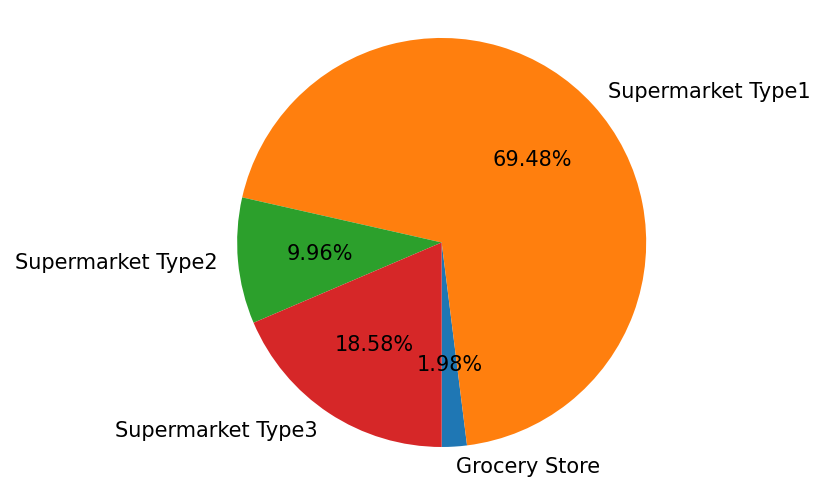

In [22]:
#Gráfico de torta; cortes ordenados y gráficados contra reloj.
#size = df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(outlettype.values, labels=outlettype.index, autopct="%.2f%%", shadow = False, startangle=-90)

#ax1.pie(df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().values, labels=size.index, autopct="%.2f%%", shadow = False, startangle=-90)
#ax1.pie(df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum(), labels=size.index, autopct="%.2f%%", shadow = False, startangle=-90)

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()

#Armamos un grafico ahora por tipo de producto, esta muy feo visualmente

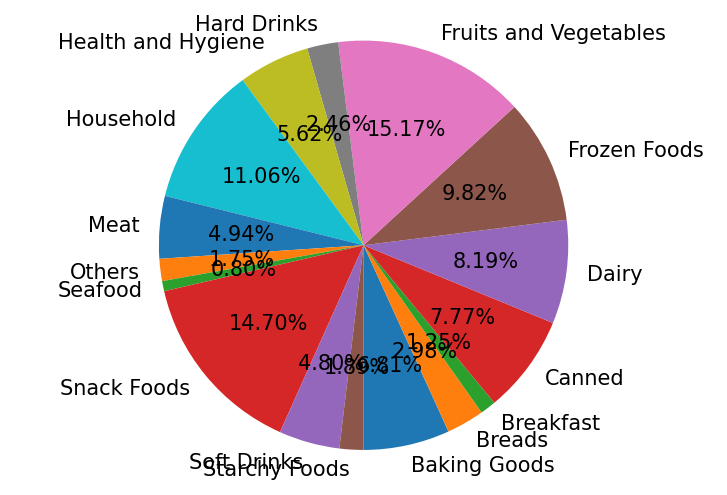

In [65]:
fig2 = plt.figure(dpi=150)
ax2 = fig2.add_subplot(1,1,1) 
#dfx=df.sort_values(by='Item_Outlet_Sales' , ascending=False)
#dfx=df.sort_values(['Item_Type','Item_Outlet_Sales'],ascending=False).groupby('Item_Type')

ax2.pie(df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().values, labels=df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index, autopct="%.2f%%", shadow = False, startangle=-90)

ax2.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)





plt.show()

#Construiremos graficos por cada tipo de tienda para entender cuales son los tipos de productos y poder mirar cual es el mas vendido

creamos filtros por cada uno de los 4 tipos de tiendas

In [33]:
spmk1 = df['Outlet_Type']=="Supermarket Type1"
df2 = df.loc[spmk1, :]
ya=df2.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()  #.sort_values(by='Item_Outlet_Sales', ascending=False, inplace=True)

spmk2 = df['Outlet_Type']=="Supermarket Type2"
df3 = df.loc[spmk2, :] #.sort_values(by='Item_Outlet_Sales', ascending=False, inplace=True)
yb=df3.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()

spmk3 = df['Outlet_Type']=="Supermarket Type3"
df4 = df.loc[spmk3, :]  #.sort_values(by='Item_Outlet_Sales', ascending=False, inplace=True)
yc=df4.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()

spmk4 = df['Outlet_Type']=="Grocery Store"
df5 = df.loc[spmk4, :]  #.sort_values(by='Item_Outlet_Sales', ascending=False, inplace=True)
yd=df5.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()

Graficamos y organizamos dichos graficos para que queden en un hoja

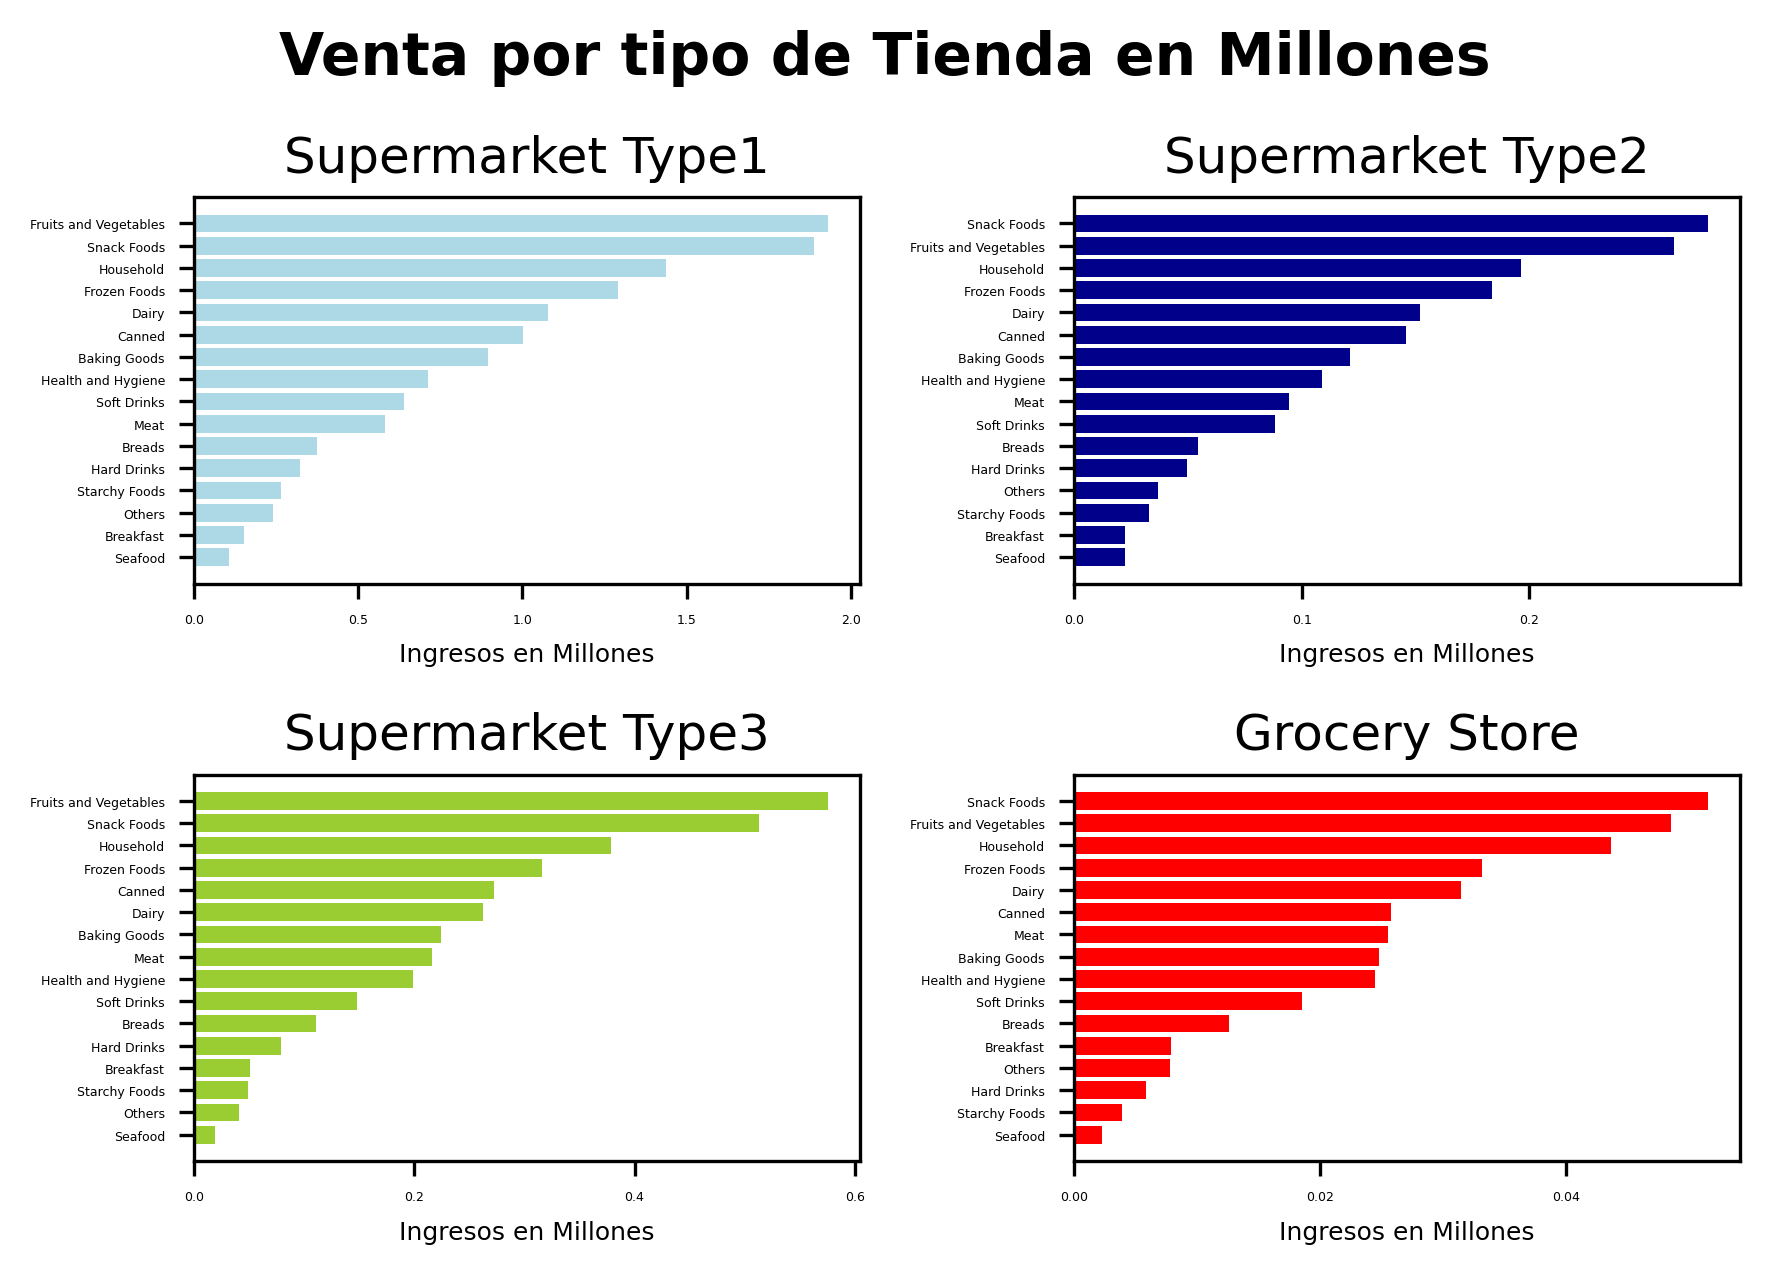

In [50]:
fig3 = plt.figure(dpi=300)

ya = (df2.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()/1000000).sort_values()
yb = (df3.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()/1000000).sort_values()
yc = (df4.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()/1000000).sort_values()
yd = (df5.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()/1000000).sort_values()

ax3=fig3.add_subplot(2,2,1)
ax3.barh(ya.index, ya.values, color='lightblue')
ax3.set_xlabel('Ingresos en Millones',size=6)
ax3.set_title('Supermarket Type1')
plt.yticks(fontsize=3) 
plt.xticks(fontsize=3)

ax4=fig3.add_subplot(2,2,2)
ax4.barh(yb.index, yb.values, color='darkblue')
ax4.set_xlabel('Ingresos en Millones',size=6)
ax4.set_title('Supermarket Type2')
plt.yticks(fontsize=3) 
plt.xticks(fontsize=3)

ax5=fig3.add_subplot(2,2,3)
ax5.barh(yc.index, yc.values, color='yellowgreen')
ax5.set_xlabel('Ingresos en Millones',size=6)
ax5.set_title('Supermarket Type3')
plt.yticks(fontsize=3) 
plt.xticks(fontsize=3) 

ax6=fig3.add_subplot(2,2,4)
ax6.barh(yd.index, yd.values, color='red')
ax6.set_xlabel('Ingresos en Millones',size=6)
ax6.set_title('Grocery Store')
plt.yticks(fontsize=3) 
plt.xticks(fontsize=3) 

fig3.suptitle("Venta por tipo de Tienda en Millones", fontsize=14, fontweight="bold", y=1.05)
#plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=0.8, wspace=0.4, hspace=0.4)

fig3.tight_layout()

plt.show()

In [36]:
ya

Item_Type
Baking Goods             0.895461
Breads                   0.375509
Breakfast                0.151527
Canned                   1.000560
Dairy                    1.076694
Frozen Foods             1.292668
Fruits and Vegetables    1.931958
Hard Drinks              0.323554
Health and Hygiene       0.712755
Household                1.437220
Meat                     0.581045
Others                   0.240153
Seafood                  0.105608
Snack Foods              1.889387
Soft Drinks              0.638025
Starchy Foods            0.265218
Name: Item_Outlet_Sales, dtype: float64

Frutas y Vegetales junto con snacks son los mas vendidos por tipo de tienda.

#Vamos a revisar la correlacion de una categoria que esperamos que a mayor visibilidad, tenga mayor ingreso, como podrian ser los productos de higiene

El mapa de correlacion nos dara una idea de como se correlacionan las variables, dandonos cuenta que la variable MRP (precio Minorista) es importante.

In [69]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009215,0.025967,-0.013417,0.013198
Item_Visibility,-0.009215,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025967,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.013417,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013198,-0.128625,0.567574,-0.049135,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


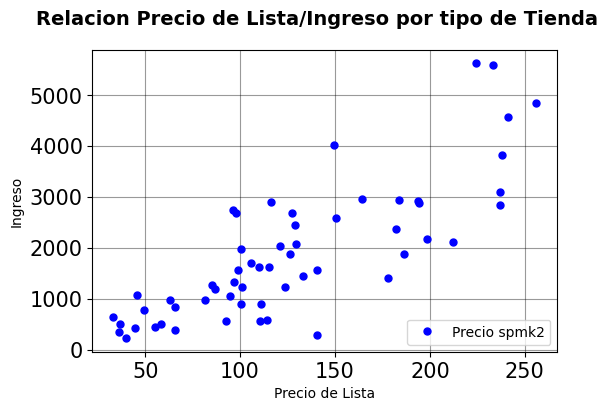

In [72]:
pc=df['Item_Type']=='Health and Hygiene'
spmk2 = df['Outlet_Type']=="Supermarket Type2"


dfz=df.loc[spmk2 & pc, :]

fig5=plt.figure(dpi=100) 
plt.plot(dfz['Item_MRP'],dfz['Item_Outlet_Sales'],"b.",lw=1, ms=10, label='Precio spmk2')
fig5.suptitle("Relacion Precio de Lista/Ingreso por tipo de Tienda", fontsize=14, fontweight="bold")
plt.ylabel("Ingreso")
plt.xlabel("Precio de Lista")
plt.xticks(fontsize = 15) #Se agregaron para ejercicio parte 2
plt.yticks(fontsize = 15) #Se agregaron para ejercicio parte 2
plt.legend(loc="lower right")
plt.grid(c = 'k', 
         alpha = .4,
         linestyle = '-')
ax7=plt.axes()
ax7.set_facecolor(color='White')
plt.show()